<h1><font color='#154360'>Predicting</font> <font color='#CD6155'>Titanic</font> <font color='#154360'>Survival</font></h1>

This project will use logistic regression to predict whether a group of passengers survived the Titanic tragedy. 

The dataset was obtained from <a href='https://www.kaggle.com'>Kaggle</a> and comes in two groups, train.csv and test.csv. The train.csv comes with the survival outcomes, known as the 'ground truth', and therefore contains the data that I will use to train the model. The test.csv, on the other hand, does not have the survival outcomes. This group of datapoints, therefore, will be fed into the model to predict the survival outcomes.  

------------------------

In [1]:
# Import the libraries I'll be using:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Turns off filtering warnings in the notebook:
import warnings
warnings.filterwarnings('ignore')
# Use "FiveThirtyEight" stylesheet:
plt.style.use('fivethirtyeight')

In [3]:
# Set the color profiles, largely for reference
# Shade of red and dark blue:
colors1 = ['#CD6155', '#154360']
# Colors used in FiveThirtyEight stylesheet (blue, red, yellow, green, gray):
colors2 = ['#30a2da', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b']

--------------------------

I'll create dataframes from both *.csv files, and look at the info for each:

In [4]:
# Create two dataframes, one from each .csv file:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
# The info on the train dataframe:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# The info on the test dataframe:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# Display the head of the first dataframe:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Display the head of the second dataframe:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


-----------------------

Next, I'll combine both dataframes into one and look at both the details and the head of the dataframe:

In [9]:
# Combine the two dataframes into one large dataframe:
df = pd.concat([train, test])
# Get the info from this combines dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
# Display the head of this combined dataframe:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I'll now convert the column names to lowercase for this combined dataframe and reset the index:

In [11]:
# Convert column names to lowercase:
df.columns = df.columns.str.lower()
# Reset the index:
df.reset_index(
    inplace=True, 
    drop=True
)

---------------------------

<div id='eda'>
    <h1><font color='#CD6155'>E</font><font color='#154360'>ploratory</font> <font color='#CD6155'>D</font><font color='#154360'>ata</font> <font color='#CD6155'>A</font><font color='#154360'>nalysis</font></h1>
</div>

Next, we'll do some descriptive statistics and look at the central tendency for the ages of the passengers:

In [12]:
# Get the central tendency of ages
# Mean age:
average_age = df['age'].mean()
# Median age:
median_age = df['age'].median()
# Standard deviation:
std_age = df['age'].std()
# Minimum age:
min_age = df['age'].min()
# Maximum age:
max_age = df['age'].max()
# Print these values:
print(f'Average age:   ------------   {average_age}')
print(f'Median age:   -------------   {median_age}')
print(f'Standard deviation:   -----   {std_age}')
print(f'Youngest person\'s age:   --   {min_age}')
print(f'Oldest person\'s age:   ----   {max_age}')

Average age:   ------------   29.881137667304014
Median age:   -------------   28.0
Standard deviation:   -----   14.413493211271334
Youngest person's age:   --   0.17
Oldest person's age:   ----   80.0


Below, we can see that the distribution of ages is unimodal and slightly skewed-right with a large number of infants and small children. 

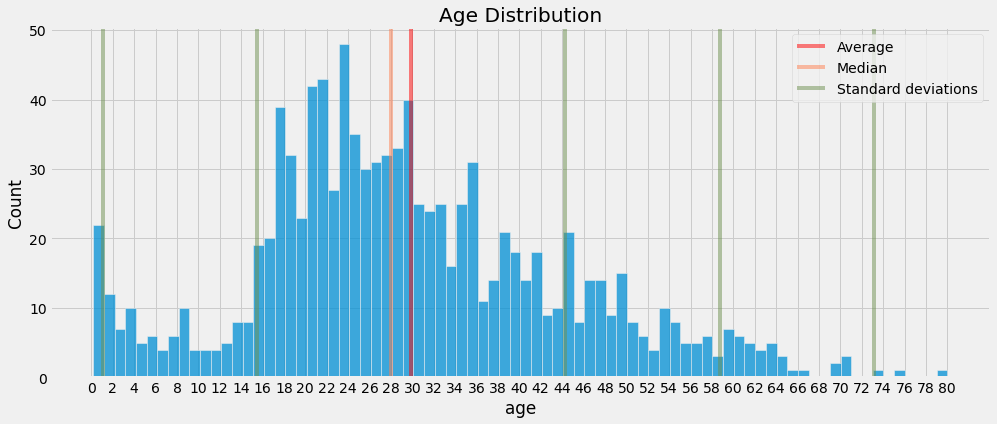

In [13]:
## Histogram for age distributions
# Figure and set the figure
plt.figure(figsize=(15, 6))
# Histogram:
sns.histplot(
    data=df, 
    x=df['age'], 
    bins=80
)
# Horizontal line for mean:
plt.axvline(
    df['age'].mean(), 
    color='red', 
    alpha=0.5, 
    label='Average'
)
# Horizontal line for median:
plt.axvline(
    median_age, 
    color='coral', 
    alpha=0.5, 
    label='Median'
)
# Horizontal lines for standard deviations:
plt.axvline(
    average_age - std_age, 
    color='#6d904f', 
    alpha=0.5, 
    label='Standard deviations'
)
plt.axvline(
    average_age - std_age * 2, 
    color='#6d904f', 
    alpha=0.5
)
plt.axvline(
    average_age + std_age, 
    color='#6d904f', 
    alpha=0.5
)
plt.axvline(
    average_age + std_age * 2, 
    color='#6d904f', 
    alpha=0.5
)
plt.axvline(
    average_age + std_age * 3, 
    color='#6d904f', 
    alpha=0.5
)
# Legend:
plt.legend()
# Set title:
plt.title('Age Distribution')
# x-axis ticks for ages through 81, stepping at 2:
plt.xticks(range(0, 81, 2))
plt.show()

----------------------

Below, we can see that there are many more males than females. As we'll see later in this analysis, a lot of these appear to be single males, in their early to mid twenties, traveling to the new world in Third Class. 

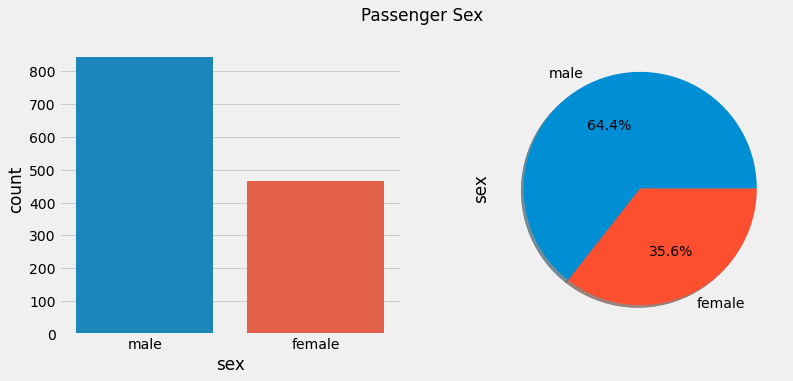

In [14]:
## Males vs. females count
# Figure and set figure size:
plt.figure(figsize=(12, 5))
# First subplot:
plt.subplot(1, 2, 1)
# Countplot
sns.countplot(
    data=df, 
    x='sex'
)
# Second subplot:
plt.subplot(1, 2, 2)
# Pie chart:
df['sex'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    shadow=True
)
# Figure title:
plt.suptitle('Passenger Sex')
plt.show()

Let's look at the age distribution by sex:

In [15]:
# Grouping by sex to create a new dataframe for average ages:
avg_age_by_sex = df.groupby('sex')['age'].mean().reset_index()
# Split dataframe into two new dataframes, one for each sex:
males = df[df['sex'] == 'male']
females = df[df['sex'] == 'female']

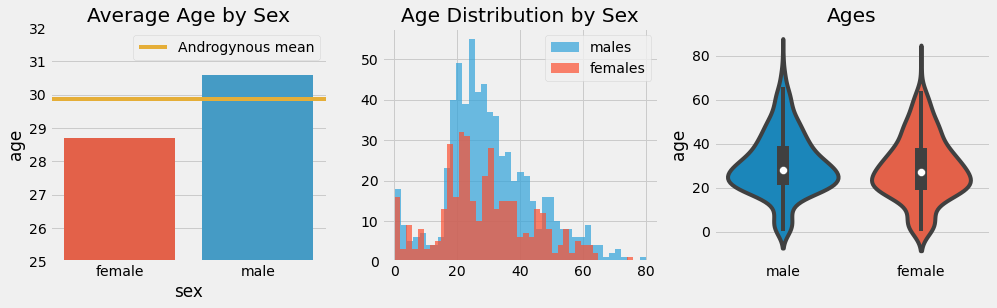

In [16]:
# Visualizations for average age by sexes
# Figure and set its size:
plt.figure(figsize=(15, 4))
# First subplot:
plt.subplot(1, 3, 1)
# Barplot:
sns.barplot(
    data=avg_age_by_sex, 
    x='sex', 
    y='age', 
    palette=['#fc4f30', '#30a2da']
)
# Horizontal line for average age of both sexes:
plt.axhline(
    average_age, 
    color='#e5ae38', 
    label='Androgynous mean'
)
# Set the scale of the barplot:
plt.ylim(25, 32)
# Title of first subplot:
plt.title('Average Age by Sex')
# Legend:
plt.legend()
# Second subplot:
plt.subplot(1, 3, 2)
# Histograms:
plt.hist(
    males['age'], 
    bins=41, 
    color=colors2[0], 
    alpha=0.7, 
    label='males'
)
plt.hist(
    females['age'], 
    bins=41, 
    color=colors2[1], 
    alpha=0.7, 
    label='females'
)
# Title for second subplot:
plt.title('Age Distribution by Sex')
# Legend:
plt.legend()
# Third subplot:
plt.subplot(1, 3, 3)
# Violinplot:
sns.violinplot(
    x='sex', 
    y='age', 
    data=df
)
plt.title('Ages')
plt.xlabel('')
plt.show()

Not a lot of difference between the average age of males and females, but worth pointing out. 

Next, I'm going to break down the passenger classes by sex:

In [17]:
# I'll create a dataframe for each passenger class:
# First class
fc = df[df['pclass'] == 1].reset_index()
# Second class
sc = df[df['pclass'] == 2].reset_index()
# Third class
tc = df[df['pclass'] == 3].reset_index()

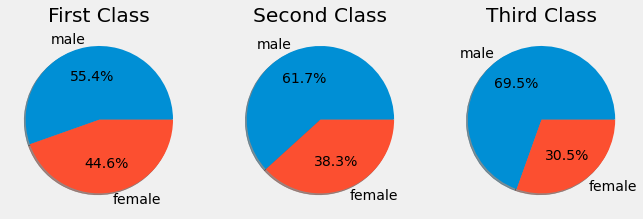

In [18]:
# Create pie charts showing the sex proportions for each passenger class
# Figure and figure size:
plt.figure(figsize=(10, 5))
# First subplot:
plt.subplot(1, 3, 1)
# First Class pie chart:
fc['sex'].value_counts().plot(
    kind='pie', 
    shadow=True, 
    autopct='%.1f%%'
)
# Remove the y-axis label:
plt.ylabel('')
# Set title:
plt.title('First Class')
# Second subplot:
plt.subplot(1, 3, 2)
# Pie chart for second class:
sc['sex'].value_counts().plot(
    kind='pie', 
    shadow=True, 
    autopct='%.1f%%'
)
# Remove the y-axis label:
plt.ylabel('')
# Set title:
plt.title('Second Class')
# Third subplot:
plt.subplot(1, 3, 3)
# Third class pie chart:
tc['sex'].value_counts().plot(
    kind='pie', 
    shadow=True, 
    autopct='%.1f%%'
)
# Remove the y-axis label:
plt.ylabel('')
# Create the title:
plt.title('Third Class')
plt.show()

While there were more males than females in all three passenger classes, First Class had a high proprtion of females than Second Class, and Third Class had the lowest propertion of females. 

-------------------------

Next, let's look at the age distributions by passenger class.

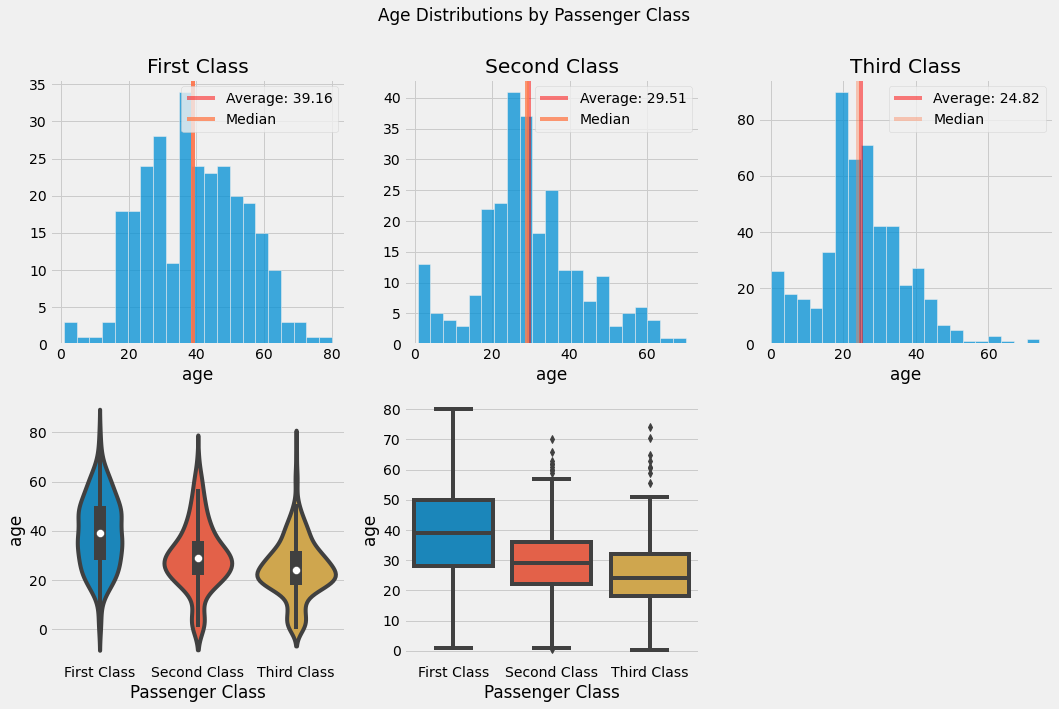

In [19]:
# Age Distributions for each Passenger Class
pclabels = ['First Class', 'Second Class', 'Third Class']
# Figure and figure size:
plt.figure(figsize=(16, 10))
# Figure Title:
plt.suptitle('Age Distributions by Passenger Class')
# First subplot for First Class:
plt.subplot(2, 3, 1)
# Histogram for 1st class:
sns.histplot(
    x='age', 
    data=fc, 
    bins=21
)
# Mean age:
plt.axvline(
    fc['age'].mean(), 
    color='red', 
    alpha=0.5, 
    label='Average: {:.2f}'.format(fc['age'].mean())
)
# Median age:
plt.axvline(
    fc['age'].median(), 
    color='coral', 
    alpha=0.8, 
    label='Median'
)
# Legend:
plt.legend()
# Subplot title:
plt.title('First Class')
# Y-axis label:
plt.ylabel('')
# Second subplot for Second Class:
plt.subplot(2, 3, 2)
# Histogram for 2nd class:
sns.histplot(
    x='age', 
    data=sc, 
    bins=21
)
# Mean age:
plt.axvline(
    sc['age'].mean(), 
    color='red', 
    alpha=0.5, 
    label='Average: {:.2f}'.format(sc['age'].mean())
)
# Median age:
plt.axvline(
    sc['age'].median(),
    color='coral', 
    alpha=0.8, 
    label='Median'
)
# Legend:
plt.legend()
# Subplot title:
plt.title('Second Class')
# Y-axis label:
plt.ylabel('')
# Third Subplot for Third Class:
plt.subplot(2, 3, 3)
# Histogram for 3rd class:
sns.histplot(
    x='age', 
    data=tc, 
    bins=21
)
# Mean age:
plt.axvline(
    tc['age'].mean(), 
    color='red', 
    alpha=0.5, 
    label='Average: {:.2f}'.format(tc['age'].mean())
)
# Median age:
plt.axvline(
    tc['age'].median(), 
    color='coral', 
    alpha=0.4, 
    label='Median'
)
# Legend:
plt.legend()
# Subplot title:
plt.title('Third Class')
# Y-axis label:
plt.ylabel('')
# Fourth subplot (2nd row):
plt.subplot(2, 3, 4)
# Violin plot:
sns.violinplot(
    data=df, 
    x='pclass', 
    y='age'
)
# X-axis label:
plt.xlabel('Passenger Class')
# X-axis ticks:
plt.xticks([0,1, 2], pclabels)
# Fifth subplot:
plt.subplot(2, 3, 5)
# Boxplot:
sns.boxplot(
    data=df, 
    x='pclass', 
    y='age'
)
# X-axis label:
plt.xlabel('Passenger Class')
# X-axis ticks:
plt.xticks([0,1, 2], pclabels)
plt.show()

The average age decreases for each passenger class. There is an almost 10 year difference in the average ages for First and Second Classes. Third Class has the lowest average age of just under 25 years old, which is a 14 year difference from First Class with an average age of just over 39. 

While the average age differences are greater than expected, it makes sense that First Class passengers would be older on average, as older people have had more time to accumulate wealth, and thus older people are more likely to have the kind of wealth needed to travel First Class. 

-----------------------------

let's look at how many passengers are in each class.

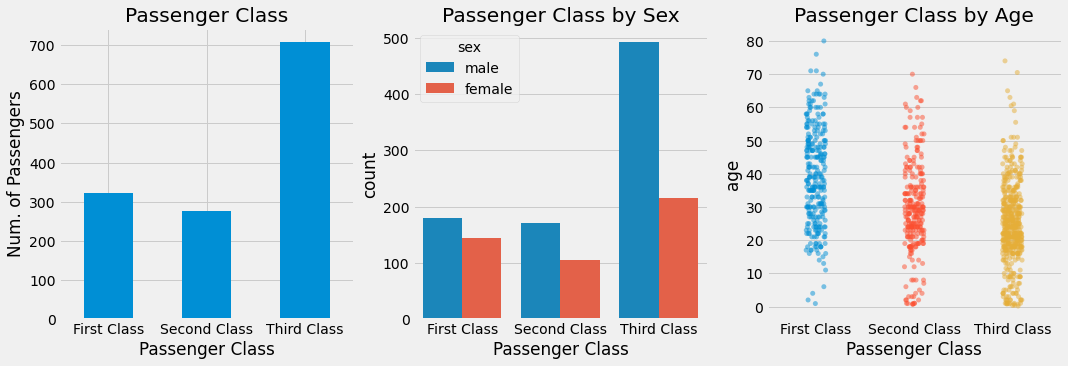

In [20]:
## Barchart for count of passengers in each class
# Figure and figure size:
plt.figure(figsize=(16, 5))
# First subplot:
plt.subplot(1, 3, 1)
# Bar plot from a groupby:
df.groupby('pclass')['pclass'].count().plot(kind='bar')
# Correct x-axis tick rotation:
plt.xticks([0,1,2], pclabels, rotation=0)
# x-axis label:
plt.xlabel('Passenger Class')
# y-axis label:
plt.ylabel('Num. of Passengers')
# Title:
plt.title('Passenger Class')
# Second subplot:
plt.subplot(1, 3, 2)
# Countplot:
sns.countplot(
    x='pclass', 
    hue='sex', 
    data=df)
# X-axis label:
plt.xlabel('Passenger Class')
# X-axis ticks:
plt.xticks([0,1,2], pclabels)
# Subplot title:
plt.title('Passenger Class by Sex')
# Third subplot:
plt.subplot(1, 3, 3)
# Stripplot:
sns.stripplot(
    data=df, 
    x='pclass', 
    y='age', 
    alpha=0.5
)
plt.title('Passenger Class by Age')
plt.xticks([0,1,2], pclabels)
plt.xlabel('Passenger Class')
plt.show()

As we can see from the charts above, there are alot more males than females in Third Class. We can also see that most of the people in Third Class are in their twenties. It makes sense to have a lot of young men in Third Class, as they are likely headed to the new world seeking their fortunes in the new world. While it seems like so long ago, it's not that different from today. 

  

------------------

<div id='log'>
    <h1><font color='#CD6155'>Logistic</font> <font color='#154360'>Regression</font></h1>
</div>

I need to clean, transform and preprocess the data for the logistic regression model. I plan on using <code>Sex</code>, <code>Age</code>, and the passenger class as features to predict <code>Survived</code>. However, there are some missing values in <code>Age</code>, and I'll <mark>One Hot Encode</mark> (OHE) the passenger classes.

Let's look at some of these missing values for <code>Age</code>:

In [21]:
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


I'll use the mean passenger age to fill in the missing values, and I'll do this for both the train and test dataframes:

In [22]:
# Fill null values with average age for both dataframes:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(train['Age'].mean(), inplace=True)

Let's look at some of the filled in values:

In [23]:
# The datapoints using the dataset mean age:
train[train['Age'].between(29, 30)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


As we can see, 222 datapoints from the <mark>train</mark> dataframe had their <font color='red'>null</font> values replaced with the mean age.

-------------------

Next, I need to convert the <code>Sex</code> column to <font color='blue'>0</font> and <font color='blue'>1</font> instead of <code>male</code> and <code>female</code>.

In [24]:
# Make sure there are only two values:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [25]:
# I'll use two different techniques, although the same result
# Using replace for first dataframe:
train['Sex'].replace(['female', 'male'], [1, 0], inplace=True)
# Using map for second dataframe:
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0})

------------------

With the <font>null</font> values in <code>Age</code> changed to the mean age, and <code>Sex</code> converted to binary, I'll now turn to one hot encoding the passenger class. 

I'll create two new columns, <code>FirstClass</code> for First Class passengers and <code>SecondClass</code> for Second Class passengers. Third Class passengers are infered if both <code>FirstClass</code> and <code>SecondClass</code> features are <font color='blue'>0</font>:

In [26]:
# Add two One Hote Encoded columns for passenger class for each dataset, train and test:
train['FirstClass'] = train['Pclass'].apply(lambda x: 1 if x == 1 else 0)
train['SecondClass'] = train['Pclass'].apply(lambda x: 1 if x == 2 else 0)
test['FirstClass'] = test['Pclass'].apply(lambda x: 1 if x == 1 else 0)
test['SecondClass'] = test['Pclass'].apply(lambda x: 1 if x == 2 else 0)

Let's look at the head of the train dataframe to see the values:

In [27]:
# Check the first five rows:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


------------------------

I'm going to put away the <code>test</code> dataframe for now. After our model is created, trained, and scored, I'll run the data from the <code>test</code> dataframe through the model to classify each datapoint. For now, I'm going to focus only on the <code>train</code> dataframe. 

I'll select the features to build the model on:

In [28]:
# Select the features and the labels:
features = train[['Sex', 'Age', 'FirstClass', 'SecondClass']]
# Dependent variable:
survival = train['Survived']

Next, I'm going to split the data from the <code>train</code> dataset into <mark>train</mark> and <mark>test</mark> datasets for scoring purposes only, and therefore I'll split it 90/10:

In [32]:
# Split the training dataset into testing and test datasets:
train_features, test_features, train_labels, test_labels = train_test_split(features, survival, test_size=0.1)

I'll now scale the features so that they have a mean of <font color='blue'>0</font> and a standard deviation of <font color='blue'>1</font>. I'm then going to create and train the model:

In [33]:
# Scale the features to a mean of 0 and standard deviation of 1:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
# Create and train the model
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

I can now score the model for the <mark>train</mark> and <mark>test</mark> datasets:

In [34]:
# Score the training data:
score_train =model.score(train_features, train_labels)
print(f'Training score: {score_train}')
# Score the test data:
score_test = model.score(test_features, test_labels)
print(f'Testing score: {score_test}')

Training score: 0.7902621722846442
Testing score: 0.8888888888888888


Next, I'll write a function to count the number of wrong predictions for the <mark>test</mark> dataset. 

In [35]:
# Function to calculate number of wrong predictions of the test (split) data
def calc_errors(predictions, actuals):
    """Returns the number of wrong predictions from the test data"""
    errors = 0   # Set error counter
    for i in range(len(predictions)):    # Loop through predictions
        if predictions[i] != actuals[i]: # If predictions differe from actuals
            errors += 1
    return errors

In [36]:
# Make predictions on the test (from the split) dataset:
test_predict = model.predict(test_features)
# Get the list of real or actual labels from test to compare our predictions to:
test_actual = test_labels.values

Now I'll call the <code>calc_errors</code> function:

In [37]:
print(f'{calc_errors(test_predict, test_actual)} wrong predictions out of {len(test_predict)} total predictions')

10 wrong predictions out of 90 total predictions


Not too bad, but more than I'd like. Shortly, I'll look at the prediction probabilities and see if I can tune the classification thresholding, or I can tune the model in other ways. However, let's first look at the <mark>coefficients</mark>.

------------------------

In [38]:
# Analyze the coefficients
print(model.coef_)
print('--------')
print(list(zip(['Sex', 'Age', 'FirstClass', 'SecondClass'], model.coef_[0])))

[[ 1.19472223 -0.40860746  0.9623835   0.48868095]]
--------
[('Sex', 1.194722234814783), ('Age', -0.4086074599203145), ('FirstClass', 0.962383502600348), ('SecondClass', 0.4886809548393411)]


After looking at the coefficients, the <code>Sex</code> feature seems to be the most important in predicting survival for the Titanic tragedy.

----------------------

Now that we have trained our model, let's run the data from the <code>test</code> dataframe throuogh it so we can predict whether those passengers survived or not:

In [39]:
# Define our features:
test_passengers = test[['Sex', 'Age', 'FirstClass', 'SecondClass']]
# Scale the features:
test_passengers = scaler.transform(test_passengers)

Let's look at the predicted labels and the prediction probabilities (I'll print only the first 5 probabilities):

In [40]:
# The predicted labels:
predict = model.predict(test_passengers)
# The prediction probabilities:
predict_probability = model.predict_proba(test_passengers)
print(f'Predict: {predict}')
# print out the prediction probability for the first five datapoints:
print(f'Predict probabilities: {predict_probability[0:5]}')

Predict: [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Predict probabilities: [[0.91935537 0.08064463]
 [0.58652293 0.41347707]
 [0.89004846 0.10995154]
 [0.90015205 0.09984795]
 [0.39347187 0.6065

The <mark>prediction probability</mark> returns the probability for both possible classes, positive (<font color='blue'>1</font>) or negative (<font color='blue'>0</font>). Sklearn's default <mark>threshold</mark> is a probability of <font color='blue'>0</font>.<font color='blue'>5</font>. If a positive class probability is <font color='blue'>0</font>.<font color='blue'>5</font> or greater, the datapoint is assigned to the positive class (<font color='blue'>1</font>).

For my purposes here, I will leave this default threshold as is. 

---------------

Now let's add the predicted labels to the <code>test</code> dataframe in a new <code>Survived</code> column:

In [41]:
# Add Survived column with predicted values to dataframe:
test['Survived'] = predict.tolist()

Let's look at the head of our dataframe and check the new column:

In [42]:
# Check the head of the dataframe:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


------------------------

I can now combine the <code>train</code> and <code>test</code> dataframes into a new <code>titanic</code> dataframe, since I now have the <code>Survived</code> column in both.

To do this, I'll reorder the columns so I can just <code>concat</code> the dataframes. First, let's look at the columns in each dataframe:

In [43]:
# Check the order of the columns in each dataframe:
print(f'train: {train.columns}')
print(f'test: {test.columns}')

train: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FirstClass',
       'SecondClass'],
      dtype='object')
test: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FirstClass', 'SecondClass',
       'Survived'],
      dtype='object')


Now I'll just reorder the columns of the <code>test</code> dataframe and then add both <code>train</code> and <code>test</code> dataframes to a new dataframe, <code>titanic</code>, using concat:

In [44]:
# Put the column names into a list in the proper order:
column_order = train.columns.to_list()
# reassign the column names in the correct order:
test = test[column_order]
# Create a new dataframe by adding train and test and together:
titanic = pd.concat([train, test])

I'm going to change the values of the <code>Sex</code> column from the binary <font color='blue'>0</font> and <font color='blue'>1</font> back to the strings <mark>male</mark> and <mark>female</mark>:

In [45]:
# Replace 0,1 with male,female:
titanic['Sex'].replace([1, 0], ['female', 'male'], inplace=True)

Now I'll look at the info for our new master dataframe to make sure everything looks okay:

In [46]:
# Info for new titanic dataframe:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  FirstClass   1309 non-null   int64  
 13  SecondClass  1309 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 153.4+ KB


Everything looks good so far. 

---------------------------

I'm going to do some exploratory data analysis with the new <code>Survived</code> column:

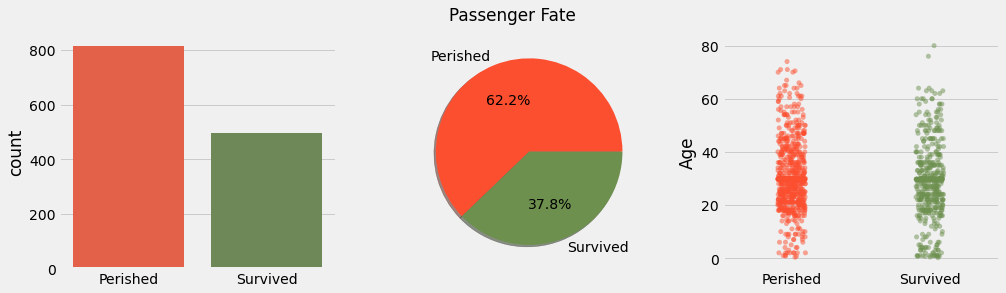

In [47]:
## Passenger fate (Perished vs. Survived) bar/count and pie
# Labels:
labels = ['Perished', 'Survived']
# Figure and figure size:
plt.figure(figsize=(15, 4))
# Figure title:
plt.suptitle('Passenger Fate')
# First subplot:
plt.subplot(1, 3, 1)
# Countplot
sns.countplot(
    data=titanic, 
    x='Survived', 
    palette=[colors2[1], colors2[3]]
)
# x-axis ticks for countplot:
plt.xticks([0, 1], labels)
# Remove automatic ylabel
plt.xlabel('')
# Second subplot:
plt.subplot(1, 3, 2)
# Pie chart
titanic['Survived'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    shadow=True, 
    labels=labels, 
    colors=[colors2[1], colors2[3]]
)
# Remove ylabel:
plt.ylabel('')
# Third subplot:
plt.subplot(1, 3, 3)
# stripplot:
sns.stripplot(
    x='Survived', 
    y='Age', 
    data=titanic, 
    alpha=0.5, 
    palette=[colors2[1], colors2[3]]
)
# Set ticks and labels for x-axis:
plt.xticks([0, 1], ['Perished', 'Survived'])
# Remove the x-axis label:
plt.xlabel('')
plt.show()

From the charts above, we can see that more passengers perished than survived. We can also see that age is not a good indicator of survival fate. 

----------------------

Next, let's look at survival by sex.

In [48]:
# Get a count of the survived passengers by sex:
sex_survived = titanic.groupby(['Survived', 'Sex'])['PassengerId'].count().reset_index()
# Create new dataframe with only the sex and survival status:
fate = titanic[['Sex', 'Survived']]
# Relabel the survival status:
fate['Survived'].replace([0, 1], ['Perished', 'Survived'], inplace=True)
# Create two new dataframes for each sex:
titanic_females = titanic[titanic['Sex'] == 'female']
titanic_males = titanic[titanic['Sex'] == 'male']

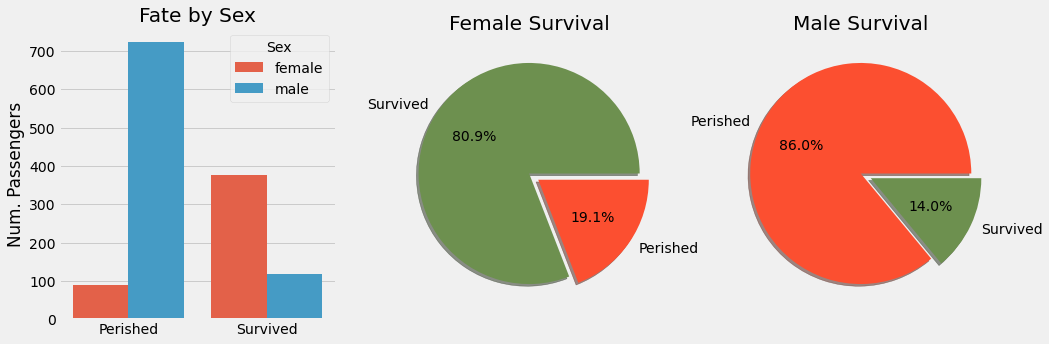

In [49]:
## Survival by sex
# Create the labels for female and male:
flabels = ['Survived', 'Perished']
mlabels = ['Perished', 'Survived']
# Figure and figure size:
plt.figure(figsize=(15, 5))
# First subplot:
plt.subplot(1, 3, 1)
# Barplot
sns.barplot(
    data=sex_survived, 
    x='Survived', 
    y='PassengerId', 
    hue='Sex', 
    palette=['#fc4f30', '#30a2da']
)
# x-axis ticks for barplot:
plt.xticks([0,1], ['Perished', 'Survived'])
# Remove xlabel:
plt.xlabel('')
# Set ylabel:
plt.ylabel('Num. Passengers')
# Set subplot title:
plt.title('Fate by Sex')
# Second subplot:
plt.subplot(1, 3, 2)
# First of two pie charts (female):
titanic_females['Survived'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    shadow=True, 
    explode=(0, 0.1), 
    labels=flabels, 
    colors=[colors2[3], colors2[1]]
)
# Remove ylabel:
plt.ylabel('')
# Set subplot title:
plt.title('Female Survival')
# Third subplot:
plt.subplot(1, 3, 3)
# Second of two pie charts (male):
titanic_males['Survived'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    shadow=True, 
    explode=(0, 0.1), 
    labels=mlabels, 
    colors=[colors2[1], colors2[3]]
)
# Remove ylabel:
plt.ylabel('')
# Set subplot title:
plt.title('Male Survival')
plt.show()

We can see that alot more women survived than men. This is likely because of the notion; "Women and children first." Women, especially those in First Class, as we'll see in a moment, had a much better chance of survival. 

-------------------------

In [50]:
survived = titanic[titanic['Survived'] == 1]
perished = titanic[titanic['Survived'] == 0]

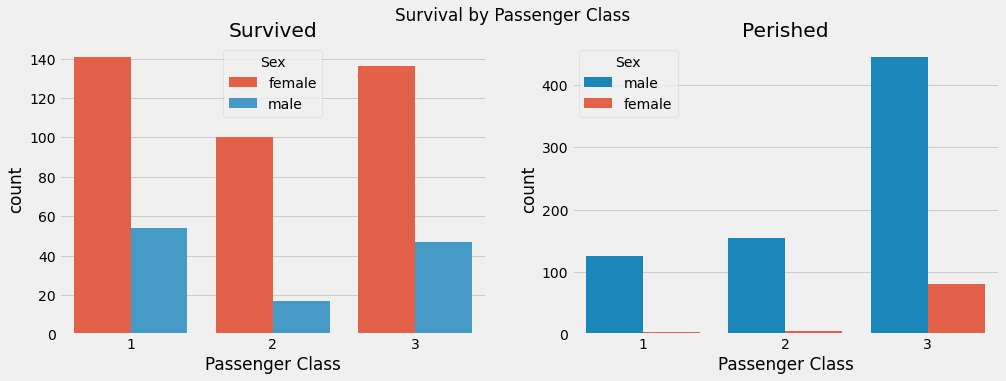

In [51]:
# Survival by class
# Create the colors list:
color = [colors2[1], colors2[0]]
# Figure and figure size:
plt.figure(figsize=(15, 5))
# Figure title:
plt.suptitle('Survival by Passenger Class')
# First subplot:
plt.subplot(1, 2, 1)
# Countplot for survived:
sns.countplot(
    data=survived, 
    x='Pclass', 
    hue='Sex', 
    palette=color
)
# Subplot title:
plt.title('Survived')
# X-axis label:
plt.xlabel('Passenger Class')
# Second subplot:
plt.subplot(1, 2, 2)
# Countplot for perished:
sns.countplot(
    data=perished, 
    x='Pclass', 
    hue='Sex'
)
# Subplot title:
plt.title('Perished')
# X-axis label:
plt.xlabel('Passenger Class')
plt.show()

We can see that most women who perished were from Third Class. This is likely due to Third Class being further away from the upper decks where the lifeboats were. 

---------------------

Let's get a better look at survivability by passenger class.

In [52]:
# What percentage of 1st class, 2nd class and 3rd class passengers survived? Draw up pie charts to show
first_class = titanic[titanic['Pclass'] == 1]
second_class = titanic[titanic['Pclass'] == 2]
third_class = titanic[titanic['Pclass'] == 3]

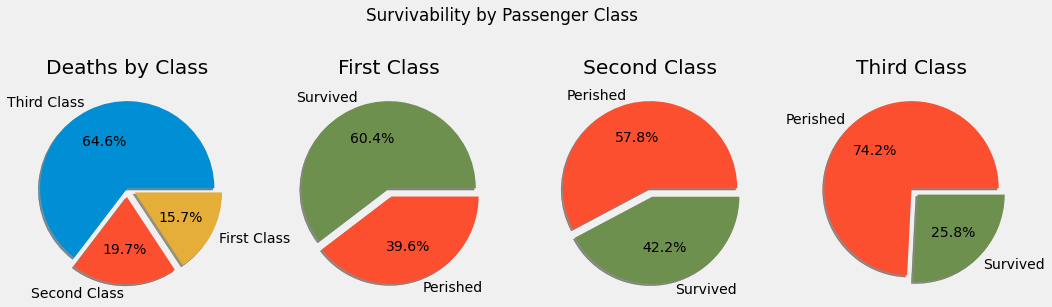

In [53]:
## Survivability by class
# Figure and figure size:
plt.figure(figsize=(16, 5))
# Set tight layout:
plt.tight_layout()
# Figure title:
plt.suptitle('Survivability by Passenger Class')
# First subplot:
plt.subplot(1, 4, 1)
# Pie chart, death by class:
perished['Pclass'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    shadow=True, 
    explode=(0, 0.1, 0.1), 
    labels=['Third Class', 'Second Class', 'First Class']
)
# Subplot title:
plt.title('Deaths by Class')
# Remove ylabel:
plt.ylabel('')
# Second subplot:
plt.subplot(1, 4, 2)
# Pie chart, survivability for first class:
first_class['Survived'].value_counts().plot(
    kind='pie', 
    labels=['Survived', 'Perished'], 
    explode=(0, 0.1), 
    shadow=True, 
    autopct='%.1f%%',
    colors=[colors2[3], colors2[1]]
)
# Subplot title:
plt.title('First Class')
# Remove ylabel:
plt.ylabel('')
# Third subplot:
plt.subplot(1, 4, 3)
# Pie chart, survivability for second class:
second_class['Survived'].value_counts().plot(
    kind='pie', 
    labels=['Perished', 'Survived'], 
    explode=(0, 0.1), 
    shadow=True, 
    autopct='%.1f%%',
    colors=[colors2[1], colors2[3]]
)
# Subplot title:
plt.title('Second Class')
# Remove ylabel:
plt.ylabel('')
# Fourth subplot:
plt.subplot(1, 4, 4)
# Pie chart, survivability for third class:
third_class['Survived'].value_counts().plot(
    kind='pie', 
    labels=['Perished', 'Survived'], 
    explode=(0, 0.1), 
    shadow=True, 
    autopct='%.1f%%',
    colors=[colors2[1], colors2[3]]
)
# Subplot title:
plt.title('Third Class')
# Remove ylabel:
plt.ylabel('')
plt.show()

Better passenger classes meant better chances of survival. As we can see from the pie charts above, First Class passengers had a much higher chance of survival than the other two classes. The Third Class passengers had the worst chance of survival, with only a little over a quarter surviving.

In [54]:
# Split into six dataframes based on sex and passenger classes
# Males:
mfc = titanic_males[titanic_males['Pclass'] == 1]
msc = titanic_males[titanic_males['Pclass'] == 2]
mtc = titanic_males[titanic_males['Pclass'] == 3]
# Females:
ffc = titanic_females[titanic_females['Pclass'] == 1]
fsc = titanic_females[titanic_females['Pclass'] == 2]
ftc = titanic_females[titanic_females['Pclass'] == 3]

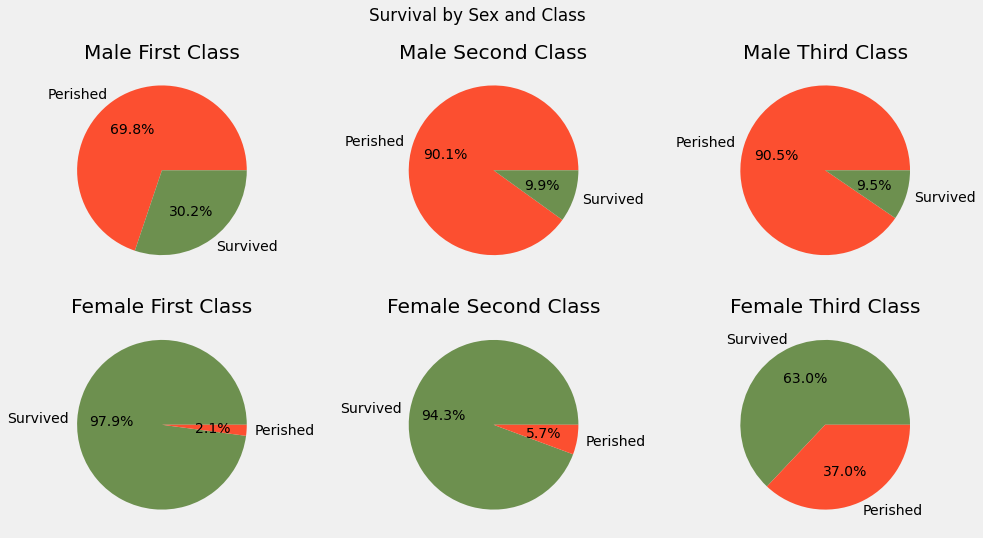

In [55]:
## More males perished than survived in all three classes
# Labels for male charts:
mplabels = ['Perished', 'Survived']
## More females survived than perished in all three classes
# Labels for female charts:
fplabels = ['Survived', 'Perished']
## Colors
# Male chart colors:
mpcolors = [colors2[1], colors2[3]]
# Female chart colors:
fpcolors = [colors2[3], colors2[1]]
# Figure and figure size:
plt.figure(figsize=(15, 8))
# Figure title:
plt.suptitle('Survival by Sex and Class')
# First subplot:
plt.subplot(2, 3, 1)
# pie chart for males - First Class:
mfc['Survived'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    labels=mplabels, 
    colors=mpcolors
)
# Remove the ylabel:
plt.ylabel('')
# Subplot title:
plt.title('Male First Class')
# Second subplot:
plt.subplot(2, 3, 2)
# pie chart for males - Second Class:
msc['Survived'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    labels=mplabels, 
    colors=mpcolors)
# Remove the ylabel:
plt.ylabel('')
# Subplot title:
plt.title('Male Second Class')
# Third subplot:
plt.subplot(2, 3, 3)
# pie chart for males - Third Class:
mtc['Survived'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    labels=mplabels, 
    colors=mpcolors
)
# Remove the ylabel:
plt.ylabel('')
# Subplot title:
plt.title('Male Third Class')
# Fourth subplot:
plt.subplot(2, 3, 4)
# pie chart for females - First Class:
ffc['Survived'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    labels=fplabels, 
    colors=fpcolors
)
# Remove the ylabel:
plt.ylabel('')
# Subplot title:
plt.title('Female First Class')
# Fifth subplot:
plt.subplot(2, 3, 5)
# pie chart for females - Second Class:
fsc['Survived'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    labels=fplabels, 
    colors=fpcolors
)
# Remove the ylabel:
plt.ylabel('')
# Subplot title:
plt.title('Female Second Class')
# Fourth subplot:
plt.subplot(2, 3, 6)
# pie chart for females - Third Class:
ftc['Survived'].value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    labels=fplabels, 
    colors=fpcolors
)
# Remove the ylabel:
plt.ylabel('')
# Subplot title:
plt.title('Female Third Class')
plt.show()

A couple of things jump out about the above pie charts. The first is the for males, we can see that males in First Class had the greatest chance of survival. Nothing surprising here. What is suprising, however, is that Second and Third Classes had about the same chance of survival. A difference of about only .4 percentage points, well within the margin of error. 

For females, First and Second Classes presented the greatest chances of survival. Only a couple of percentage points difference. In reality, its only a difference of 3 deaths, 3 vs. 6 female deaths for First and Second Classes respectively. Females in Third Class had the smallest chance of surviving. 

-------------------------

<h1><font color=colors1[0]>Conclusion:</font></h1>

We started with two datasets, where one of the datasets was missing the <code>Survived</code> column. We used <mark>logistic regression</mark> to predict whether these passengers survived. 

Upon further analysis, I found that sex and passenger class were the best determinants of survival for the Titanic tragedy. 